In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/Seattle2014.csv')
df.head()

,STATION,STATION_NAME,DATE,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,WSF2,WSF5,WT01,WT05,WT02,WT03
0,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140101,0,0,0,72,33,12,340,310,36,40,-9999,-9999,-9999,-9999
1,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140102,41,0,0,106,61,32,190,200,94,116,-9999,-9999,-9999,-9999
2,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140103,15,0,0,89,28,26,30,50,63,72,1,-9999,-9999,-9999
3,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140104,0,0,0,78,6,27,40,40,45,58,1,-9999,-9999,-9999
4,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140105,0,0,0,83,-5,37,10,10,67,76,-9999,-9999,-9999,-9999


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   STATION       365 non-null    object
 1   STATION_NAME  365 non-null    object
 2   DATE          365 non-null    int64 
 3   PRCP          365 non-null    int64 
 4   SNWD          365 non-null    int64 
 5   SNOW          365 non-null    int64 
 6   TMAX          365 non-null    int64 
 7   TMIN          365 non-null    int64 
 8   AWND          365 non-null    int64 
 9   WDF2          365 non-null    int64 
 10  WDF5          365 non-null    int64 
 11  WSF2          365 non-null    int64 
 12  WSF5          365 non-null    int64 
 13  WT01          365 non-null    int64 
 14  WT05          365 non-null    int64 
 15  WT02          365 non-null    int64 
 16  WT03          365 non-null    int64 
dtypes: int64(15), object(2)
memory usage: 48.6+ KB


In [5]:
df['STATION'].unique()

array(['GHCND:USW00024233'], dtype=object)

In [6]:
def summary(df) :
    tf = pd.DataFrame({'데이터형태(dtypes)' : df.dtypes,
                       '결측치 수(null)' : df.isnull().sum(),
                       '고유값 수(nunique)' : df.nunique()})
    return tf

In [7]:
df.shape
summary(df)

(365, 17)

,데이터형태(dtypes),결측치 수(null),고유값 수(nunique)
STATION,object,0,1
STATION_NAME,object,0,1
DATE,int64,0,365
PRCP,int64,0,74
SNWD,int64,0,2
SNOW,int64,0,4
TMAX,int64,0,59
TMIN,int64,0,42
AWND,int64,0,69
WDF2,int64,0,37


<AxesSubplot:>

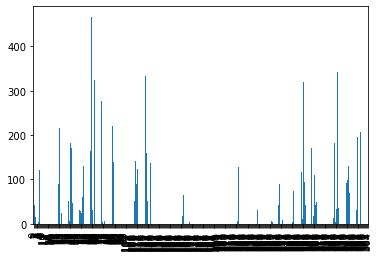

In [8]:
df['PRCP'].plot.bar()

In [9]:
rainfall = df['PRCP'].values
inches = rainfall / 254 # 1/10mm -> inches
inches.shape

(365,)

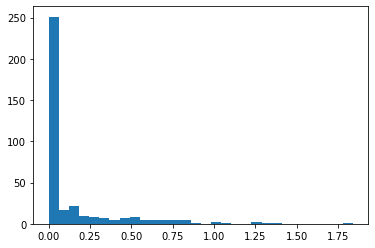

In [10]:
plt.hist(inches, 30);

In [11]:
inches.mean()

0.1329737892352497

In [12]:
from scipy import stats
stats.mode(inches)

ModeResult(mode=array([0.]), count=array([215]))

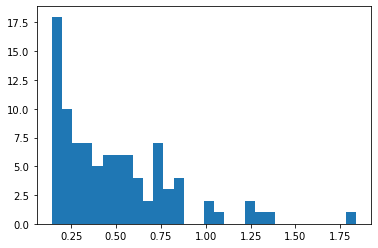

In [13]:
plt.hist(inches[inches> inches.mean()], 30);

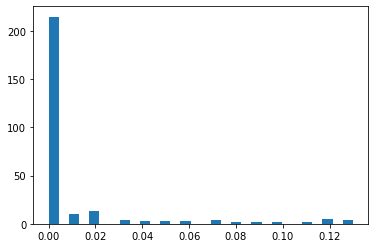

In [14]:
plt.hist(inches[inches< inches.mean()], 30);

<AxesSubplot:>

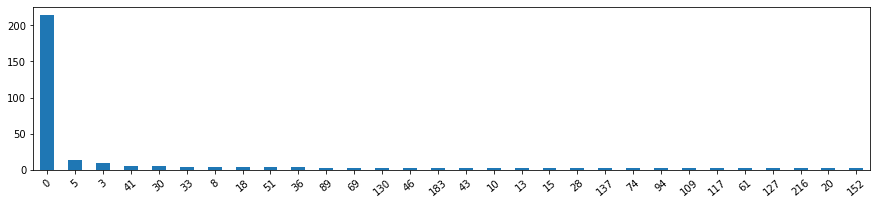

In [15]:
df['PRCP'].value_counts().nlargest(30).plot.bar(rot ='40', figsize=(15,3))